# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [147]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [148]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
# SMOTE FOR OVERSAMPLING
from imblearn.over_sampling import SMOTE

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [149]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [151]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [152]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<Axes: >

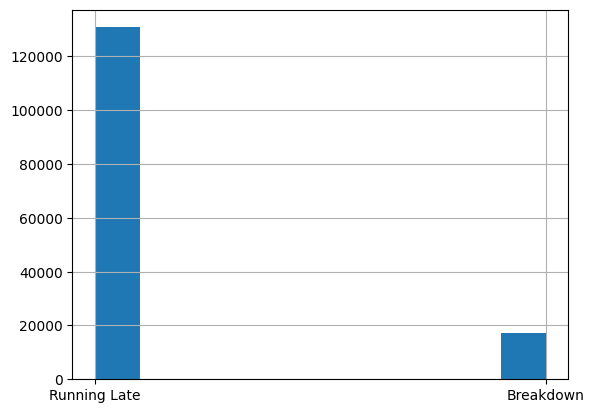

In [153]:
targetval = df['Breakdown_or_Running_Late']
targetval.hist()
# target values inconsistent, i will apply SMOTE down

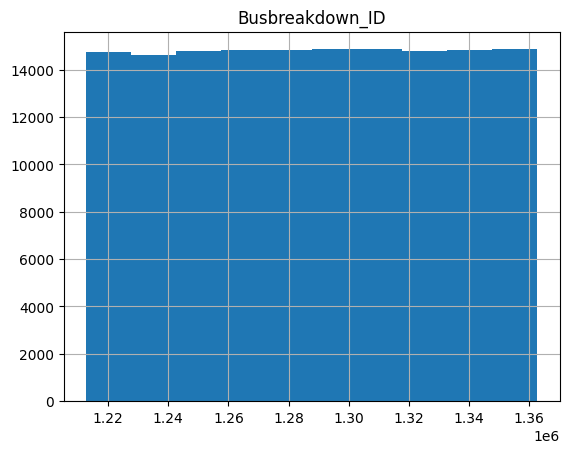

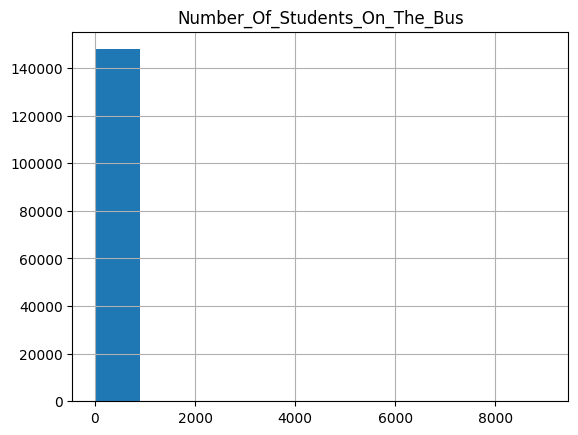

In [154]:
for col in df.columns:
  if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
    plt.title(df[col].name)
    df[col].hist()
    plt.show()

In [155]:
for col in df.columns:
  if df[col].dtypes == 'object':
    print(df[col].value_counts())
    print("===================")

School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64
Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64
Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1
1409B        1
Name: count, Length: 11283, dtype: int64
Reason
Heavy Traffic                  87426
Other                          21666
Mechanical Problem            

<Axes: >

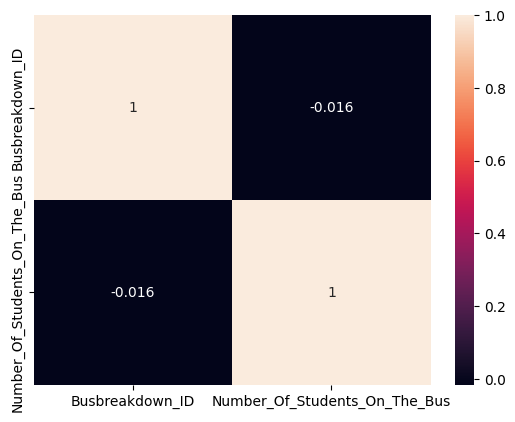

In [156]:
import seaborn as sns
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9a12397e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9a1239d20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9a1239540>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9a123a260>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9a123a500>],
 'means': []}

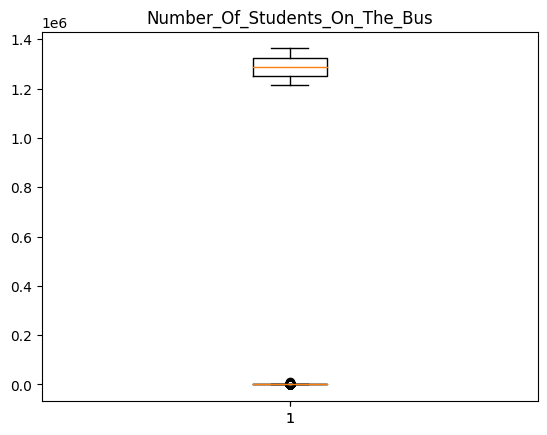

In [157]:
# for col in df.columns:
#   if df[col].dtype == 'number':
#     plt.title(df[col].name)
#     plt.boxplot(df[col])
plt.title(df['Busbreakdown_ID'].name)
plt.boxplot(df['Busbreakdown_ID'])

plt.title(df['Number_Of_Students_On_The_Bus'].name)
plt.boxplot(df['Number_Of_Students_On_The_Bus'])

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [158]:
for col in df.columns:
  print(df[col].name)
  print(df[col].unique())

School_Year
['2015-2016' '2016-2017' '2017-2018' '2019-2020']
Busbreakdown_ID
[1224901 1225098 1215800 ... 1353044 1353045 1353046]
Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
Bus_No
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
Route_Number
['1' '2' 'P640' ... '012' '29AM' '1409B']
Reason
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
Schools_Serviced
['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
Occurred_On
['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
Created_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ..

In [159]:
#Dates (i will try extract the time if i have time)
# occured_on = pd.to_datetime(df['Occurred_On'], format=('%H:%M:%S'))
# df['Created_On']
# df['Informed_On']
# df['Last_Updated_On']
# df['Occurred_On']

In [160]:
df = df.drop('Incident_Number',axis=1)
df = df.drop('Busbreakdown_ID',axis=1)
df = df.drop('Schools_Serviced',axis=1)
df = df.drop('Bus_No',axis=1)
df = df.drop('Route_Number',axis=1)
df = df.drop('How_Long_Delayed',axis=1)
df = df.drop('Created_On',axis=1)
df = df.drop('Informed_On',axis=1)
df = df.drop('Last_Updated_On',axis=1)
df = df.drop('Occurred_On',axis=1)

for col in df.columns:
  df[col] = df[col].fillna(df[col].mode()[0])

In [161]:
def remove_outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  lower_b= Q1 - 1.5 *IQR
  upper_b= Q3 + 1.5 *IQR
  return df[(df[col] >= lower_b)&(df[col] <= upper_b)]

remove_outliers(df,'Number_Of_Students_On_The_Bus')

,School_Year,Run_Type,Reason,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,Pre-K/EI,Other,Bronx,"G.V.C., LTD.",5,Yes,Yes,No,Running Late,Pre-K
1,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",3,Yes,Yes,No,Running Late,Pre-K
5,2015-2016,Special Ed AM Run,Heavy Traffic,Bronx,ACME BUS CORP. (B2321),3,Yes,Yes,Yes,Running Late,School-Age
6,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",3,Yes,Yes,Yes,Running Late,Pre-K
7,2015-2016,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",4,Yes,Yes,No,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",7,Yes,Yes,No,Running Late,Pre-K
147968,2016-2017,Pre-K/EI,Heavy Traffic,Bronx,"G.V.C., LTD.",0,Yes,Yes,No,Running Late,Pre-K
147969,2016-2017,Special Ed PM Run,Heavy Traffic,Bronx,G.V.C. LTD. (B2192),0,Yes,Yes,Yes,Running Late,School-Age
147970,2016-2017,Special Ed PM Run,Won`t Start,Queens,LITTLE RICHIE BUS SERVICE,0,Yes,Yes,No,Breakdown,School-Age


In [162]:
label_encode = LabelEncoder()

for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = label_encode.fit_transform(df[col])

In [163]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
1,130857
0,17115


In [164]:
#SMOTE
smote = SMOTE()
X_smote = df.drop('Breakdown_or_Running_Late',axis = 1)
y_smote = df['Breakdown_or_Running_Late']

x_replace, y_replace = smote.fit_resample(X_smote,y_smote)
df_smotted = pd.concat([x_replace,y_replace], axis=1)

In [167]:
df_smotted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261714 entries, 0 to 261713
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      261714 non-null  int64
 1   Run_Type                         261714 non-null  int64
 2   Reason                           261714 non-null  int64
 3   Boro                             261714 non-null  int64
 4   Bus_Company_Name                 261714 non-null  int64
 5   Number_Of_Students_On_The_Bus    261714 non-null  int64
 6   Has_Contractor_Notified_Schools  261714 non-null  int64
 7   Has_Contractor_Notified_Parents  261714 non-null  int64
 8   Have_You_Alerted_OPT             261714 non-null  int64
 9   School_Age_or_PreK               261714 non-null  int64
 10  Breakdown_or_Running_Late        261714 non-null  int64
dtypes: int64(11)
memory usage: 22.0 MB


In [170]:
print("before SMOTE")
print(df['Breakdown_or_Running_Late'].value_counts())
print("after SMOTE")
print(y_replace.value_counts())

before SMOTE
Breakdown_or_Running_Late
1    130857
0     17115
Name: count, dtype: int64
after SMOTE
Breakdown_or_Running_Late
1    130857
0    130857
Name: count, dtype: int64


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [217]:
#got the oversampled values for x and y
X_train, X_test, y_train, y_test = train_test_split(x_replace, y_replace,test_size=0.2,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [239]:
model = Sequential()
model.add(Dense(64, input_dim=(X_train.shape[1])))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [244]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience = 3,
    restore_best_weights = True
)

In [240]:
emodel.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [241]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7351 - loss: 0.5416
Epoch 2/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8280 - loss: 0.4058
Epoch 3/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8730 - loss: 0.3016
Epoch 4/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8762 - loss: 0.2971
Epoch 5/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8917 - loss: 0.2617
Epoch 6/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8968 - loss: 0.2543
Epoch 7/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8992 - loss: 0.2538
Epoch 8/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9015 - loss: 0.2511
Epoch 9/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9036 - loss: 0.2458
Epoch 10/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9057 - loss: 0.2521
Epoch 11/15
6543/6543 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9106 - loss: 0.2318
Epoch 12/15
6543/65

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [245]:
model.evaluate(X_test,y_test)

1636/1636 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.2183


[0.2154148519039154, 0.9159772992134094]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [247]:
pred = model.predict(X_test)
y_pred = (pred > 0.5)

print(classification_report(y_pred,y_test))

1636/1636 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

       False       0.95      0.89      0.92     28038
        True       0.88      0.95      0.91     24305

    accuracy                           0.92     52343
   macro avg       0.92      0.92      0.92     52343
weighted avg       0.92      0.92      0.92     52343



## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

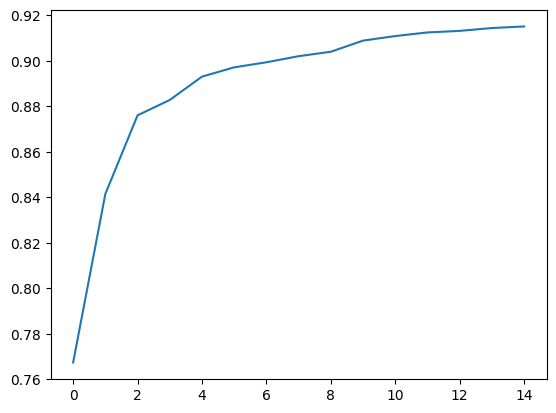

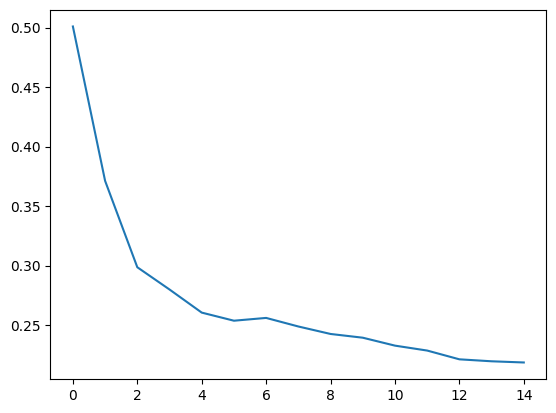

In [256]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc)
plt.show()

plt.plot(loss)
plt.show()

## Save the Model
Save the trained model for submission.

In [269]:
#used .keras because i got error and it tells me to add .keras at the end
model.save("model.keras")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- used label encoding because the data is big and i dont have the processing power to run it + i wanted to encode the dates but because the lack of time i dropped them --- and i did oversampling because the target value have one value more than the other

2- used ANN because im working on huge data + (not images ) if the data is image i would use CNN

3- used 15 epochs because if i let the training had high epochs it will lead to overfitting plus the batch_size

4-for loss i used binary_crossentropy + accuracy for classification it helped me for each training iteration with result based on my data

5- i didn't add dropout because the accuracy is already high if i add dropout i need to increase the epochs to make all neurons learn + my model is simple it will lead to overfitting

6- for metrics i used classification report because my target is binary and the best metrics for two categorical value is the classification_report or accuracy_score it show all the confusion matrix + accuracy of the model